# Sesión: Random Forest - Ensemble Learning Fundamental

## 🎯 Objetivos de la Sesión
- Entender el concepto de Ensemble Learning y Bootstrap Aggregating (Bagging)
- Dominar Random Forest para clasificación y regresión
- Comprender la importancia de features y interpretabilidad
- Comparar Random Forest con algoritmos individuales
- Implementar técnicas de optimización y validación

---

## 📚 TEORÍA

### 1. ¿Qué es Ensemble Learning?

#### Concepto Fundamental: "La Sabiduría de las Multitudes"

**Idea Central:**
> Muchos modelos simples trabajando juntos pueden superar a un modelo complejo individual

**Analogía Práctica:**
```
🎯 Problema: Estimar cuántas pelotas hay en un frasco

👤 Experto individual: Puede errar significativamente
👥 100 personas promedio: Su promedio suele estar muy cerca del valor real

¿Por qué? Los errores individuales se cancelan entre sí
```

#### Tipos de Ensemble Learning

**1. Bagging (Bootstrap Aggregating)**
```
Estrategia: Entrenar múltiples modelos en diferentes subconjuntos de datos
Ejemplo: Random Forest

Proceso:
Dataset → Bootstrap Sample 1 → Modelo 1 → Predicción 1
       → Bootstrap Sample 2 → Modelo 2 → Predicción 2
       → Bootstrap Sample N → Modelo N → Predicción N
                            ↓
                    Predicción Final = Promedio/Mayoría
```

**2. Boosting**
```
Estrategia: Entrenar modelos secuencialmente, cada uno corrige errores del anterior
Ejemplo: XGBoost, AdaBoost

Ventaja: Reduce bias (subajuste)
```

**3. Stacking**
```
Estrategia: Entrenar un "meta-modelo" que aprende cómo combinar otros modelos
Ejemplo: Usar regresión logística para combinar KNN, SVM, RF
```

#### ¿Por qué Funciona el Ensemble?

**Teorema del Límite Central Aplicado a ML:**
- Si tienes N modelos con errores independientes
- El error del ensemble disminuye como 1/√N
- Pero requiere diversidad entre modelos

**Condiciones para que funcione:**
1. **Modelos mejor que aleatorio** (accuracy > 50% para clasificación binaria)
2. **Diversidad entre modelos** (cometen errores diferentes)
3. **Suficientes modelos** para promediar errores

### 2. Random Forest: Bagging + Randomización

#### ¿Cómo construye Random Forest los árboles?

**Paso 1: Bootstrap Sampling**
```python
# Para cada árbol i:
# 1. Crear muestra bootstrap (con reemplazo)
bootstrap_sample = np.random.choice(train_indices, size=len(train_data), replace=True)

# Ejemplo con 6 muestras originales [A,B,C,D,E,F]:
# Bootstrap 1: [A,A,C,D,E,F]  ← A aparece 2 veces, B no aparece
# Bootstrap 2: [A,B,B,D,E,E]  ← B y E aparecen 2 veces, C y F no aparecen
```

**Paso 2: Random Feature Selection**
```python
# En cada nodo del árbol:
# 1. No usar todas las features, sino un subconjunto aleatorio
max_features = sqrt(total_features)  # Para clasificación
max_features = total_features / 3    # Para regresión

# Ejemplo con 12 features:
# Nodo 1: Considerar solo [F2, F5, F8, F11] para el split
# Nodo 2: Considerar solo [F1, F4, F7, F12] para el split
```

**Paso 3: Construcción del Árbol**
```python
# Cada árbol se construye:
# 1. Con su muestra bootstrap
# 2. Con selección aleatoria de features en cada nodo
# 3. Hasta criterio de parada (profundidad, min_samples_leaf, etc.)
```

**Paso 4: Aggregation**
```python
# Predicción final:
# Clasificación: Voto mayoritario
final_class = mode([tree1.predict(), tree2.predict(), ..., treeN.predict()])

# Regresión: Promedio
final_value = mean([tree1.predict(), tree2.predict(), ..., treeN.predict()])
```

#### Hiperparámetros Clave

**Número de Árboles (`n_estimators`)**
```python
n_estimators = 100  # Más árboles = mejor performance (hasta un punto)

Trade-off:
+ Más árboles: Mejor performance, más estable
- Más árboles: Más lento, más memoria
```

**Features por Split (`max_features`)**
```python
# Clasificación
max_features = 'sqrt'    # sqrt(n_features) - DEFAULT
max_features = 'log2'    # log2(n_features)
max_features = None      # Usar todas (menos randomización)

# Regresión  
max_features = 'auto'    # n_features / 3 - DEFAULT
max_features = 0.5       # 50% de las features
```

**Profundidad y Muestras**
```python
max_depth = None         # Sin límite (DEFAULT) - árboles crecen completamente
min_samples_split = 2    # Mínimas muestras para dividir nodo
min_samples_leaf = 1     # Mínimas muestras en hoja
```

#### Ventajas Únicas de Random Forest

**1. Robusto a Overfitting**
- Cada árbol individual puede sobreajustarse
- Pero el promedio de muchos árboles overfitted es más generalizable
- "Overfitting individual + Promedio = Generalización"

**2. Manejo Natural de Missing Values**
```python
# Estrategia interna:
# 1. Para cada feature faltante, proba ambas direcciones del split
# 2. Asigna la muestra a la dirección que da mejor resultado
# 3. Aprende automáticamente patrones de missingness
```

**3. Feature Importance Gratuita**
```python
# Para cada feature:
importance = sum(impureza_antes - impureza_después for cada_split_con_esa_feature)
# Normalizado por número de splits y árboles
```

**4. Out-of-Bag (OOB) Error**
```python
# Para cada muestra:
# 1. Identificar árboles que NO la usaron en entrenamiento (~37%)
# 2. Predecir usando solo esos árboles
# 3. Comparar con etiqueta real
# = Validación cruzada "gratis" sin costo computacional extra
```

### 3. Random Forest vs Otros Algoritmos

#### Comparación Conceptual

| Aspecto | Decision Tree | Random Forest | XGBoost |
|---------|---------------|---------------|---------|
| **Estrategia** | Un árbol | Muchos árboles independientes | Muchos árboles secuenciales |
| **Overfitting** | Alto riesgo | Bajo riesgo | Medio riesgo |
| **Interpretabilidad** | Muy alta | Media | Baja |
| **Velocidad Entrenamiento** | Muy rápido | Medio | Lento |
| **Velocidad Predicción** | Muy rápido | Medio | Rápido |
| **Tuning Requerido** | Mucho | Poco | Mucho |
| **Performance** | Moderado | Bueno | Muy bueno |

#### ¿Cuándo usar Random Forest?

**✅ Random Forest es ideal cuando:**
- Quieres "good performance out of the box"
- Tienes datos tabulares mixtos (numéricos + categóricos)
- Necesitas feature importance
- El dataset es mediano (1K-100K muestras)
- Quieres un modelo robusto sin mucho tuning

**❌ Considera otras opciones cuando:**
- Tienes datos de muy alta dimensionalidad (text, images)
- Necesitas máxima performance (usa XGBoost)
- Necesitas máxima interpretabilidad (usa Decision Tree)
- Tienes muy pocos datos (<500 muestras)

### 4. Feature Importance e Interpretabilidad

#### Tipos de Feature Importance en RF

**1. Impurity-based Importance (Default)**
```python
# Cálculo:
importance_i = Σ (n_samples_node / n_total_samples) * impurity_decrease

# Donde impurity_decrease = impurity_before - impurity_after_split
```

**Ventajas:**
- ✅ Rápido de calcular (ya disponible después del entrenamiento)
- ✅ Captura importancia global de la feature

**Limitaciones:**
- ❌ Sesgado hacia features con más categorías/valores únicos
- ❌ No captura interacciones complejas

**2. Permutation Importance**
```python
# Algoritmo:
# 1. Calcular baseline score en validation set
# 2. Para cada feature:
#    a. Permute (mezcla) los valores de esa feature
#    b. Recalcula score
#    c. Importance = baseline_score - permuted_score
# 3. Repetir varias veces y promediar
```

**Ventajas:**
- ✅ No sesgado hacia features categóricas
- ✅ Más interpretable (impacto real en performance)
- ✅ Funciona con cualquier métrica

**Limitaciones:**
- ❌ Más costoso computacionalmente
- ❌ Puede subestimar features correlacionadas

#### Interpretación Práctica

**Feature Importance NO significa:**
- ❌ Causalidad (X no causa Y solo porque tiene alta importancia)
- ❌ Dirección del efecto (¿aumentar X aumenta o disminuye Y?)

**Feature Importance SÍ significa:**
- ✅ Relevancia predictiva (X ayuda a predecir Y)
- ✅ Información contenida (X reduce incertidumbre sobre Y)
- ✅ Dependencia estadística (X e Y están relacionados)

---

# 📋 Ejercicio 1: Primer Contacto - Comparación Básica
## Objetivo: Ver la diferencia entre árbol individual y Random Forest

In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# 1.1 Crear dataset sintético
X, y = make_moons(n_samples=1000, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Dataset shape:", X.shape)
print("Classes:", np.unique(y))

Dataset shape: (1000, 2)
Classes: [0 1]


In [2]:
# 1.2 Entrenar modelos
# Árbol individual
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 1.3 Comparar performance
tree_train_acc = tree.score(X_train, y_train)
tree_test_acc = tree.score(X_test, y_test)

rf_train_acc = rf.score(X_train, y_train)
rf_test_acc = rf.score(X_test, y_test)

print("=== COMPARACIÓN DE PERFORMANCE ===")
print(f"Decision Tree - Train: {tree_train_acc:.3f}, Test: {tree_test_acc:.3f}")
print(f"Random Forest - Train: {rf_train_acc:.3f}, Test: {rf_test_acc:.3f}")
print(f"Overfitting Tree: {tree_train_acc - tree_test_acc:.3f}")
print(f"Overfitting RF: {rf_train_acc - rf_test_acc:.3f}")

=== COMPARACIÓN DE PERFORMANCE ===
Decision Tree - Train: 1.000, Test: 0.910
Random Forest - Train: 1.000, Test: 0.905
Overfitting Tree: 0.090
Overfitting RF: 0.095


## 🤔 Pregunta para reflexión:

+ ¿Cuál modelo tiene más overfitting?
+ ¿Por qué Random Forest regulariza mejor?

# 📋 Ejercicio 2: Explorando Hiperparámetros
## Objetivo: Entender el impacto de los hiperparámetros clave

In [3]:
# 2.1 Dataset más complejo - Breast Cancer
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    stratify=y, random_state=42)

print(f"Features: {X.shape[1]}")
print(f"Samples: Train={len(X_train)}, Test={len(X_test)}")
print(f"Classes: {cancer.target_names}")

Features: 30
Samples: Train=398, Test=171
Classes: ['malignant' 'benign']


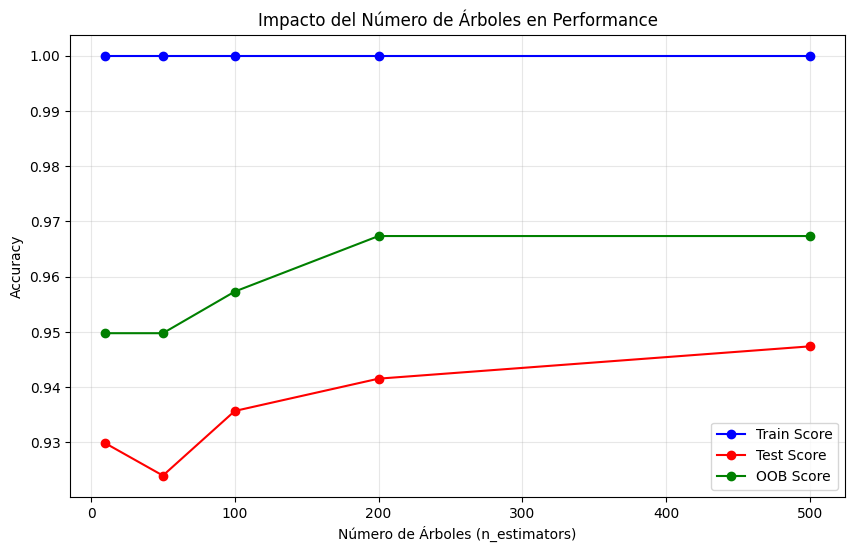

=== ANÁLISIS DE n_estimators ===
n_estimators= 10: Train=1.000, Test=0.930, OOB=0.950
n_estimators= 50: Train=1.000, Test=0.924, OOB=0.950
n_estimators=100: Train=1.000, Test=0.936, OOB=0.957
n_estimators=200: Train=1.000, Test=0.942, OOB=0.967
n_estimators=500: Train=1.000, Test=0.947, OOB=0.967


In [4]:
# 2.2 Experimentar con n_estimators
estimators_range = [10, 50, 100, 200, 500]
train_scores = []
test_scores = []
oob_scores = []

for n_est in estimators_range:
    rf = RandomForestClassifier(n_estimators=n_est, oob_score=True, 
                               random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))
    oob_scores.append(rf.oob_score_)

# Visualizar resultados
plt.figure(figsize=(10, 6))
plt.plot(estimators_range, train_scores, 'o-', label='Train Score', color='blue')
plt.plot(estimators_range, test_scores, 'o-', label='Test Score', color='red')
plt.plot(estimators_range, oob_scores, 'o-', label='OOB Score', color='green')
plt.xlabel('Número de Árboles (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Impacto del Número de Árboles en Performance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print("=== ANÁLISIS DE n_estimators ===")
for i, n_est in enumerate(estimators_range):
    print(f"n_estimators={n_est:3d}: Train={train_scores[i]:.3f}, "
          f"Test={test_scores[i]:.3f}, OOB={oob_scores[i]:.3f}")

In [5]:
# 2.3 Experimentar con max_features
feature_options = ['sqrt', 'log2', 0.5, 1.0]
results_features = {}

for max_feat in feature_options:
    rf = RandomForestClassifier(n_estimators=100, max_features=max_feat, 
                               oob_score=True, random_state=42)
    rf.fit(X_train, y_train)
    
    results_features[str(max_feat)] = {
        'train': rf.score(X_train, y_train),
        'test': rf.score(X_test, y_test),
        'oob': rf.oob_score_
    }

print("\n=== ANÁLISIS DE max_features ===")
for feat, scores in results_features.items():
    print(f"max_features={feat:>4}: Train={scores['train']:.3f}, "
          f"Test={scores['test']:.3f}, OOB={scores['oob']:.3f}")


=== ANÁLISIS DE max_features ===
max_features=sqrt: Train=1.000, Test=0.936, OOB=0.957
max_features=log2: Train=1.000, Test=0.942, OOB=0.965
max_features= 0.5: Train=1.000, Test=0.942, OOB=0.957
max_features= 1.0: Train=1.000, Test=0.942, OOB=0.952


## 🤔 Pregunta para reflexión:

- ¿A partir de cuántos árboles el performance se estabiliza?
- ¿Cómo se compara el OOB score con el test score?
- ¿Qué valor de max_features funciona mejor y por qué?

# 📋 Ejercicio 3: Feature Importance y Análisis
## Objetivo: Interpretar qué aprende Random Forest

In [6]:
# 3.1 Entrenar modelo final y analizar importancias
rf_final = RandomForestClassifier(n_estimators=200, max_features='sqrt', 
                                 oob_score=True, random_state=42, n_jobs=-1)
rf_final.fit(X_train, y_train)

print(f"Final Model - Test Accuracy: {rf_final.score(X_test, y_test):.3f}")
print(f"Final Model - OOB Score: {rf_final.oob_score_:.3f}")

Final Model - Test Accuracy: 0.942
Final Model - OOB Score: 0.967


=== TOP 10 FEATURES MÁS IMPORTANTES ===
             feature  importance
     worst perimeter    0.140867
          worst area    0.131794
worst concave points    0.122250
        worst radius    0.084863
 mean concave points    0.077145
         mean radius    0.066926
      mean perimeter    0.057674
           mean area    0.046074
      mean concavity    0.044693
     worst concavity    0.034882


C:\Users\asus  vivobook\AppData\Local\Temp\ipykernel_16948\1109697064.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='feature', x='importance', palette='viridis')


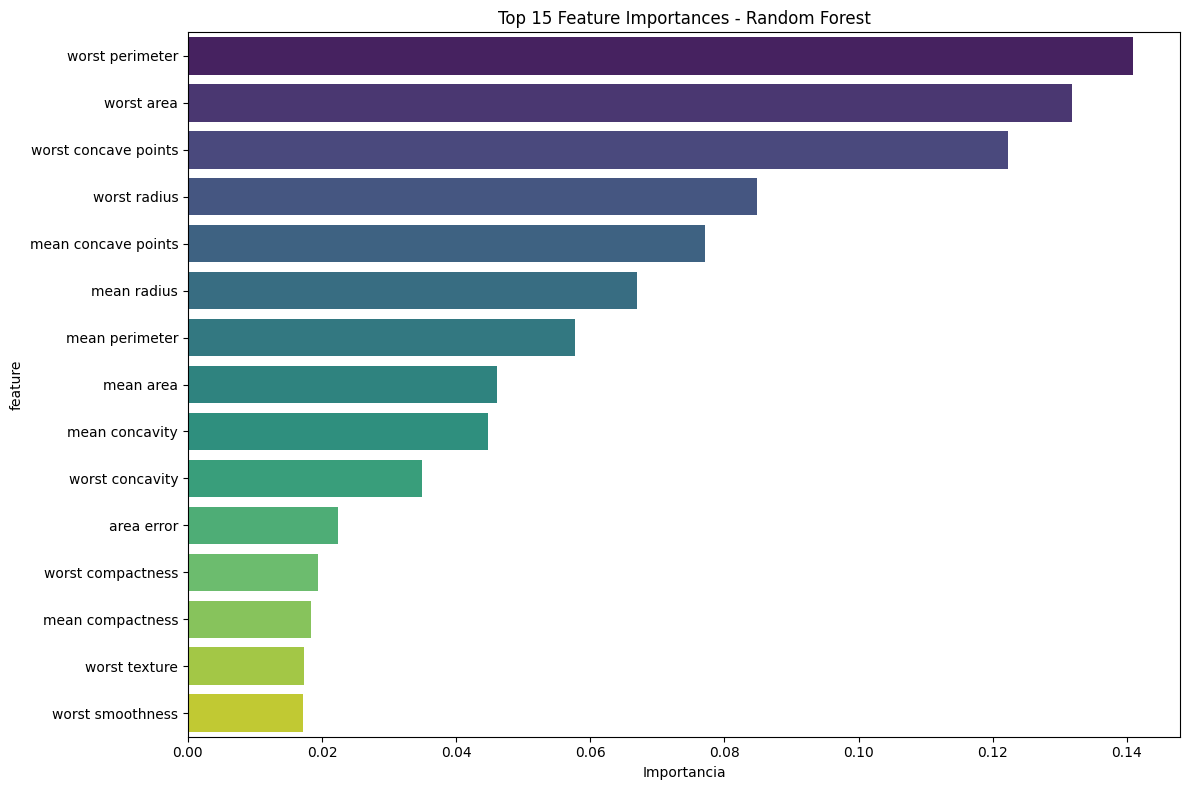

In [7]:
# 3.2 Feature Importance Analysis
feature_names = cancer.feature_names
importances = rf_final.feature_importances_

# Crear DataFrame para mejor manejo
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
}).sort_values('importance', ascending=False)

print("=== TOP 10 FEATURES MÁS IMPORTANTES ===")
print(feature_importance_df.head(10).to_string(index=False))

# Visualización
plt.figure(figsize=(12, 8))
top_features = feature_importance_df.head(15)
sns.barplot(data=top_features, y='feature', x='importance', palette='viridis')
plt.title('Top 15 Feature Importances - Random Forest')
plt.xlabel('Importancia')
plt.tight_layout()
plt.show()


=== COMPARACIÓN: IMPURITY vs PERMUTATION IMPORTANCE ===
                feature  impurity_importance  permutation_importance
          worst texture             0.017343                0.011696
         symmetry error             0.003162                0.005848
           mean texture             0.010278                0.005848
        concavity error             0.005421                0.004678
         worst symmetry             0.012574                0.003509
        worst concavity             0.034882                0.003509
       worst smoothness             0.017160                0.003509
        perimeter error             0.006743                0.003509
             area error             0.022342                0.002339
worst fractal dimension             0.008175                0.002339


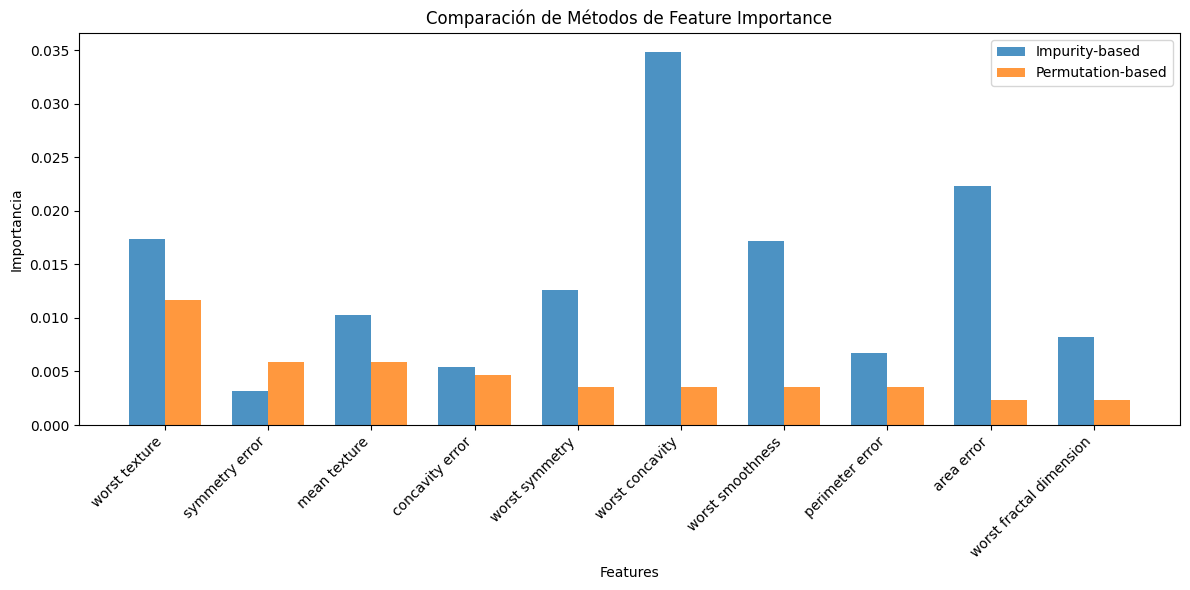

In [8]:
# 3.3 Comparar con Permutation Importance
from sklearn.inspection import permutation_importance

# Calcular permutation importance (más costoso pero más confiable)
perm_importance = permutation_importance(rf_final, X_test, y_test, 
                                       n_repeats=5, random_state=42, n_jobs=-1)

# Comparar ambos métodos
comparison_df = pd.DataFrame({
    'feature': feature_names,
    'impurity_importance': importances,
    'permutation_importance': perm_importance.importances_mean,
    'perm_std': perm_importance.importances_std
}).sort_values('permutation_importance', ascending=False)

print("\n=== COMPARACIÓN: IMPURITY vs PERMUTATION IMPORTANCE ===")
print(comparison_df.head(10)[['feature', 'impurity_importance', 'permutation_importance']].to_string(index=False))

# Gráfico comparativo
plt.figure(figsize=(12, 6))
top_10_perm = comparison_df.head(10)

x = np.arange(len(top_10_perm))
width = 0.35

plt.bar(x - width/2, top_10_perm['impurity_importance'], width, 
        label='Impurity-based', alpha=0.8)
plt.bar(x + width/2, top_10_perm['permutation_importance'], width, 
        label='Permutation-based', alpha=0.8)

plt.xlabel('Features')
plt.ylabel('Importancia')
plt.title('Comparación de Métodos de Feature Importance')
plt.xticks(x, top_10_perm['feature'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# 🤔 Pregunta para reflexión:

- ¿Qué features son consistentemente importantes en ambos métodos?
- ¿Por qué pueden diferir los dos métodos?
- ¿Qué te dicen estas features sobre el problema médico?

# 📋 Ejercicio 4: Optimización con Grid Search
## Objetivo: Encontrar los mejores hiperparámetros sistemáticamente

In [9]:
# 4.1 Definir grid de parámetros
param_grid = {
    'n_estimators': [100, 200],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print("Grid Search Configuration:")
print(f"Combinaciones totales: {np.prod([len(v) for v in param_grid.values()])}")

# 4.2 Grid Search con validación cruzada
rf_grid = RandomForestClassifier(random_state=42, n_jobs=-1)

grid_search = GridSearchCV(
    estimator=rf_grid,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Iniciando Grid Search... (esto puede tomar unos minutos)")
grid_search.fit(X_train, y_train)

print("\n=== RESULTADOS DEL GRID SEARCH ===")
print(f"Best CV Score: {grid_search.best_score_:.3f}")
print(f"Best Parameters: {grid_search.best_params_}")

# Test con mejores parámetros
best_rf = grid_search.best_estimator_
test_score = best_rf.score(X_test, y_test)
print(f"Test Score (best model): {test_score:.3f}")

Grid Search Configuration:
Combinaciones totales: 48
Iniciando Grid Search... (esto puede tomar unos minutos)
Fitting 5 folds for each of 48 candidates, totalling 240 fits

=== RESULTADOS DEL GRID SEARCH ===
Best CV Score: 0.973
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Score (best model): 0.936


In [10]:
# 4.3 Comparar modelo baseline vs optimizado
baseline_rf = RandomForestClassifier(n_estimators=100, random_state=42)
baseline_rf.fit(X_train, y_train)
baseline_score = baseline_rf.score(X_test, y_test)

print(f"\n=== COMPARACIÓN FINAL ===")
print(f"Baseline RF: {baseline_score:.3f}")
print(f"Optimized RF: {test_score:.3f}")
print(f"Mejora: {test_score - baseline_score:.3f}")

# Análisis detallado del mejor modelo
y_pred_best = best_rf.predict(X_test)
print(f"\n=== CLASSIFICATION REPORT (BEST MODEL) ===")
print(classification_report(y_test, y_pred_best, target_names=cancer.target_names))


=== COMPARACIÓN FINAL ===
Baseline RF: 0.936
Optimized RF: 0.936
Mejora: 0.000

=== CLASSIFICATION REPORT (BEST MODEL) ===
              precision    recall  f1-score   support

   malignant       0.92      0.91      0.91        64
      benign       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



# 📋 Ejercicio 5: Caso de Uso Avanzado - Dataset Personalizado
## Objetivo: Aplicar Random Forest a un problema más complejo

Dataset complejo:
Features: 20
Classes: 4
Samples per class: [494 498 507 501]

=== COMPARACIÓN DE MODELOS (Dataset Complejo) ===
               CV Mean  CV Std  Test Score
Decision Tree    0.563   0.016       0.622
Random Forest    0.751   0.023       0.755
Optimized RF     0.750   0.012       0.753


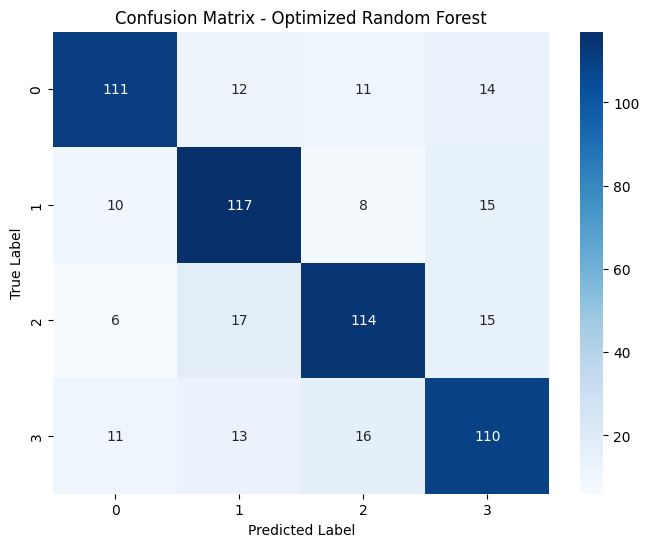

In [11]:
# 5.1 Crear dataset multiclase más desafiante
from sklearn.datasets import make_classification

X_complex, y_complex = make_classification(
    n_samples=2000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=4,
    n_clusters_per_class=2,
    class_sep=0.8,
    random_state=42
)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_complex, y_complex, test_size=0.3, stratify=y_complex, random_state=42
)

print("Dataset complejo:")
print(f"Features: {X_complex.shape[1]}")
print(f"Classes: {len(np.unique(y_complex))}")
print(f"Samples per class: {np.bincount(y_complex)}")

# 5.2 Entrenar múltiples modelos para comparación
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Optimized RF': RandomForestClassifier(
        n_estimators=200, 
        max_features='sqrt',
        max_depth=15,
        min_samples_split=5,
        random_state=42
    )
}

results_comparison = {}

for name, model in models.items():
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_c, y_train_c, cv=5)
    
    # Fit and test
    model.fit(X_train_c, y_train_c)
    test_score = model.score(X_test_c, y_test_c)
    
    results_comparison[name] = {
        'CV Mean': cv_scores.mean(),
        'CV Std': cv_scores.std(),
        'Test Score': test_score
    }

print("\n=== COMPARACIÓN DE MODELOS (Dataset Complejo) ===")
comparison_df = pd.DataFrame(results_comparison).T
print(comparison_df.round(3))

# 5.3 Matriz de confusión del mejor modelo
best_model = models['Optimized RF']
y_pred_complex = best_model.predict(X_test_c)

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_c, y_pred_complex)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Optimized Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# 🚀 Próximos pasos recomendados:

- xperimentar con datasets debalanceados (class_weight='balanced')
- robar Random Forest para regresión
- omparar con XGBoost en casos complejos
- xplorar interpretabilidad con SHAP o LIME

##💡 Tips para proyectos reales:

- Comenzar con parámetros default - Random Forest es muy robusto
- Usar OOB score para validación rápida
- Paralelizar con n_jobs=-1 para datasets grandes
- Permutation importance para interpretabilidad confiable
- GridSearch solo si necesitas el último 1-2% de performance